In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
#### Tiling with WholeSlideImage class
from core.data_model import WholeSlideImage

slide_image = WholeSlideImage(
    "/vast/AI_team/dataset/OpenDatasets/Camelyon_Challenge/CAMELYON16/images/tumor_001.tif",
    annotation_path="/vast/AI_team/dataset/OpenDatasets/Camelyon_Challenge/CAMELYON16/annotations/tumor_001.xml"
)
slide_image

WholeSlideImage(name=tumor_001, center=RUMC)

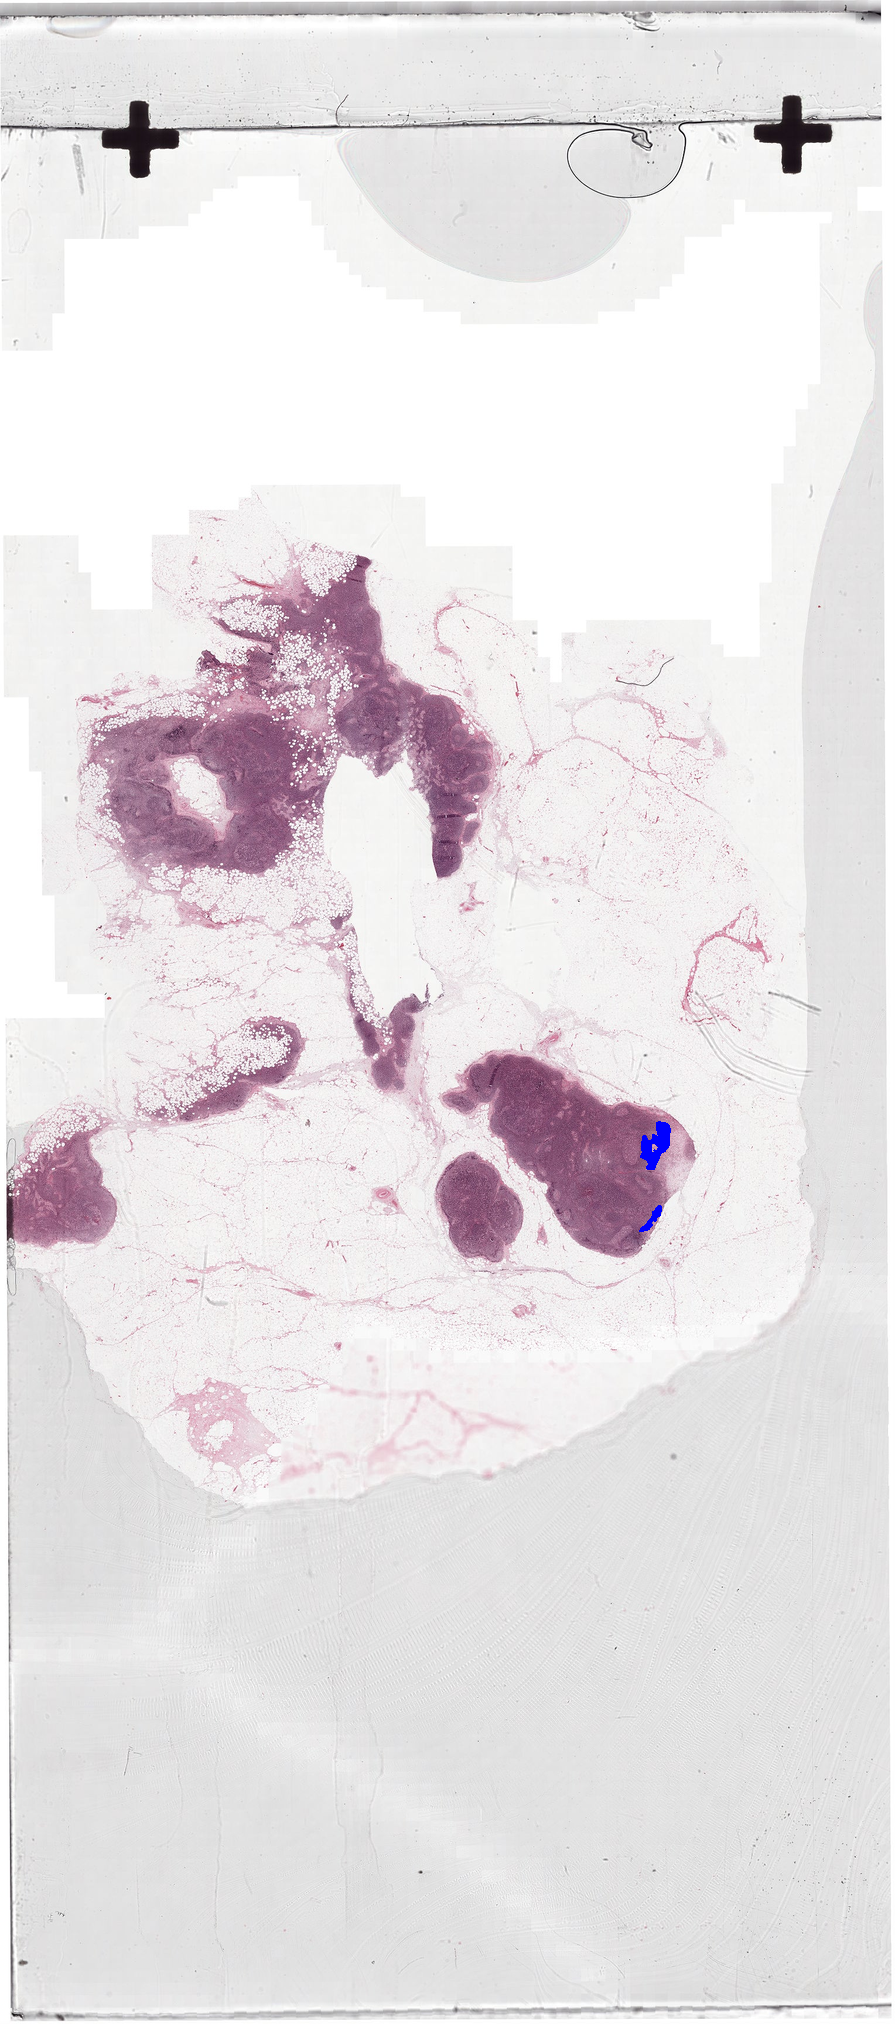

In [19]:
slide_image.get_thumbnail()

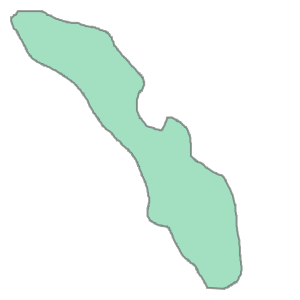

In [20]:
ployglons = slide_image.get_polygons()
ployglons[0]

In [23]:
from core.data_model import Labels
from core.patch_filter import PatchFilter
patch_filter = PatchFilter()
patch_filter.add_intersection_over_patch(ployglons)
patches = slide_image.tile_with_annotation(
    ployglons, 
    label=Labels.malignant,
    patch_size=512, 
    level=1, 
    patch_filter=patch_filter,
    verbose=True
)
patches

100%|██████████| 6/6 [00:00<00:00, 16.97it/s]


Patches(len=16, malignant(16), benign(0))

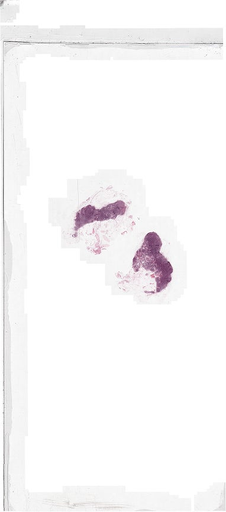

In [25]:
#### Tile without annotation for Benign WSI
slide_image = WholeSlideImage(
    "/vast/AI_team/dataset/OpenDatasets/Camelyon_Challenge/CAMELYON16/images/normal_001.tif",
)
slide_image.get_thumbnail((512, 512))

In [26]:
from core.patch_filter import PatchFilter
patch_filter = PatchFilter()
patch_filter.add_hvs_foregorund_ratio()
patches = slide_image.tile_without_annotation(
    patch_size=512,
    level=1,
    patch_filter=patch_filter,
)

  5%|▌         | 11/216 [00:18<05:41,  1.67s/it]